# Import the Libraries

We start by importing the necessary libraries:

1.  Import PyTorch (torch): Provides core functionalities for tensor
operations, automatic differentiation, and model building.
2.  Import TorchVision (torchvision): Helps load and transform datasets, especially image datasets like MNIST.
3.  Transforms (transforms): Used for applying transformations like converting images to tensors (ToTensor).
4.  DataLoader (DataLoader): Helps load data in batches, which is crucial for efficient model training.
5.  TensorDataset (TensorDataset): Combines tensors into datasets to be used for training or evaluation.
6.  Image Grids (make_grid): Allows for creating visual grids of images from datasets.Datasets (datasets): Provides access to popular datasets like MNIST or CIFAR10.
7.  Neural Network (nn): Provides modules to build layers, like convolutional and fully connected layers.
8.  Functional (F): Contains activation functions (e.g., ReLU), loss functions, etc. Optimizer (optim): Provides optimizers like Adam or SGD for model training.Variable (Variable): Wraps tensors to allow for automatic differentiation during training.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import make_grid
from torchvision import datasets

#neural net imports
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [ ]:
#import external libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import math
%matplotlib inline

#Spliting the Data

1. train_data:

    Downloads the MNIST training set (60,000 handwritten digit images) and stores it in the data folder.
    Converts the images to PyTorch tensors using ToTensor(), which normalizes pixel values to a range of 0 to 1.
    The train=True argument ensures that the training set is loaded.

2. test_data:

    Downloads the MNIST test set (10,000 images) in the same way.
    train=False ensures that the test set is loaded instead.

In [ ]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15981585.55it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 516942.67it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 1940225.04it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3830792.03it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
print(f"Number of samples: {len(train_data)}")
print(f"Image size: {train_data[0][0].size()}")
print(f"Number of classes: {len(train_data.classes)}")

Number of samples: 60000
Image size: torch.Size([1, 28, 28])
Number of classes: 10


In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
print(f"Number of samples: {len(test_data)}")
print(f"Image size: {test_data[0][0].size()}")
print(f"Number of classes: {len(test_data.classes)}")

Number of samples: 10000
Image size: torch.Size([1, 28, 28])
Number of classes: 10


In [ ]:
train_data.data.shape

torch.Size([60000, 28, 28])

60000: This is the number of images

28, 28: These represent the height and width of each image
, 28 pixels by 28 pixels

In [ ]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [ ]:
train_data.targets.size()

torch.Size([60000])

torch.Size 60000 shows that train_data.targets has 60,000 labels, one for each image in the dataset.

In [ ]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

#Data Loader

Train loader: Loads train_data in batches of 50, shuffling the data each epoch to reduce bias.

Test loader: Loads test_data in batches of 50, also shuffling the data, and uses 1 worker for loading.

In [ ]:
loader = {
    'train' : DataLoader(train_data,
                         batch_size =50,
                         shuffle = True),

    'test' : DataLoader(test_data,
                        batch_size = 50,
                        shuffle  = True,
                        num_workers = 1)

}

#Model

1. Convolutional Layer 1: conv1 (1 input channel, 10 output channels)
2. Max Pooling Layer (after conv1)
3. Convolutional Layer 2: conv2 (10 input channels, 20 output channels)
4. Dropout Layer: drop1
5. Max Pooling Layer (after conv2)
6. Flattening Layer: (not explicitly defined but done in x.view(-1, 320))
7. Fully Connected Layer 1: fc1 (320 input features, 50 output features)
8. Dropout Layer (after fc1)
9. Fully Connected Layer 2: fc2 (50 input features, 10 output features)
10. Softmax Activation Layer (in the output)

In [ ]:
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10,20, kernel_size=5)
        self.drop1 = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.drop1(self.conv2(x)),2))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training= self.training)
        x = self.fc2(x)

        return F.softmax(x)

1. Convolutional Layers:

  **self.conv1:** First convolution layer, input channels: 1, output channels: 10, kernel size: 5.
  **self.conv2:** Second convolution layer, input: 10, output: 20, kernel size: 5.
  **self.conv3:** Third convolution layer, input: 20, output: 40, kernel size: 3.
  **self.conv4:** Fourth convolution layer, input: 40, output: 80, kernel size: 1.

2.  Dropout Layer:

  **self.drop1:** A 2D dropout layer to prevent overfitting after conv2.
  Fully Connected Layers:

  **self.fc1:** First fully connected layer, input: 80, output: 50.
  self.fc2: Second fully connected layer, input: 50, output: 10 (for 10 classes).

3.  Forward Pass:

  Pass through conv1, ReLU activation, and max pooling.
  Dropout applied after conv2, followed by ReLU and max pooling.
  Pass through conv3, ReLU, and max pooling.
  Pass through conv4 and ReLU without pooling.
  Flatten tensor to match fc1 input size.
  Pass through fc1, apply ReLU, and then dropout.
  Pass through fc2 for output, apply softmax for class probabilities.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv3 = nn.Conv2d(20, 40, kernel_size=3)
        self.conv4 = nn.Conv2d(40, 80, kernel_size=1)

        # Dropout layer
        self.drop1 = nn.Dropout2d()

        # Fully connected layers
        self.fc1 = nn.Linear(80, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.drop1(self.conv2(x)), 2))
        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = F.relu(self.conv4(x))

        x = x.view(-1, 80)  # Flatten size adjusted
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x, dim=1)


#Train and Test Split

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loader['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx %20 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/ {len(loader['train'].dataset)} ({100. * batch_idx/ len(loader['train']):.0f}%)]\t{loss.item():.6f}")

def test():
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loader['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim =1, keepdim = True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loader['test'].dataset)
    print(f'\nTest Set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loader["test"].dataset)} ({100 * correct / len(loader["test"].dataset):.0f}%)\n')

In [ ]:
total_batches = len(loader['train'])
print(f"Total number of batches: {total_batches}")

for batch_idx, (data, target) in enumerate(loader['train']):
        data, target = data.to(device), target.to(device)

 # Print the number of images in the current batch
batch_size = data.size(0)
print(f"Batch {batch_idx + 1}/{total_batches}: Number of images = {batch_size}")

Total number of batches: 1200
Batch 1200/1200: Number of images = 50


In [ ]:
print(f"Using device: {device}")

Using device: cuda


In [ ]:
for epoch in range(50):
    train(epoch)
    test()

Train Epoch: 0 [0/ 60000 (0%)]	2.301528
Train Epoch: 0 [1000/ 60000 (2%)]	2.302819
Train Epoch: 0 [2000/ 60000 (3%)]	2.294920
Train Epoch: 0 [3000/ 60000 (5%)]	2.227671
Train Epoch: 0 [4000/ 60000 (7%)]	2.142400
Train Epoch: 0 [5000/ 60000 (8%)]	2.164972
Train Epoch: 0 [6000/ 60000 (10%)]	2.082275
Train Epoch: 0 [7000/ 60000 (12%)]	2.140320
Train Epoch: 0 [8000/ 60000 (13%)]	1.929432
Train Epoch: 0 [9000/ 60000 (15%)]	1.911303
Train Epoch: 0 [10000/ 60000 (17%)]	1.913324
Train Epoch: 0 [11000/ 60000 (18%)]	1.882598
Train Epoch: 0 [12000/ 60000 (20%)]	1.821171
Train Epoch: 0 [13000/ 60000 (22%)]	1.947501
Train Epoch: 0 [14000/ 60000 (23%)]	1.806824
Train Epoch: 0 [15000/ 60000 (25%)]	1.877792
Train Epoch: 0 [16000/ 60000 (27%)]	1.816440
Train Epoch: 0 [17000/ 60000 (28%)]	1.798788
Train Epoch: 0 [18000/ 60000 (30%)]	1.734279
Train Epoch: 0 [19000/ 60000 (32%)]	1.744272
Train Epoch: 0 [20000/ 60000 (33%)]	1.744967
Train Epoch: 0 [21000/ 60000 (35%)]	1.699643
Train Epoch: 0 [22000/ 60000 

#Prediction

Prediction for index 33: 4


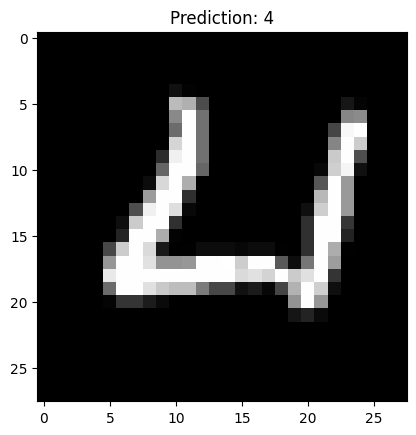

Prediction for index 78: 9


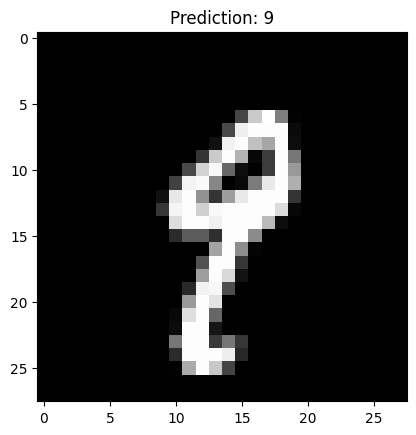

Prediction for index 666: 7


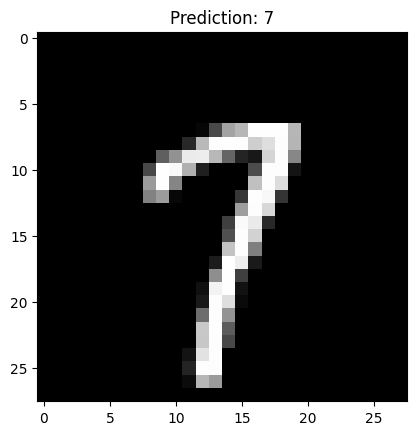

In [ ]:
import matplotlib.pyplot as plt

model.eval()

# List of indices for the test samples you want to predict
indices = [33, 78, 666]

for idx in indices:
    data, target = test_data[idx]

    # Prepare the data for the model
    data = data.unsqueeze(0).to(device)

    # Get the model's output
    output = model(data)

    # Get the predicted label
    prediction = output.argmax(dim=1, keepdim=True).item()

    print(f"Prediction for index {idx}: {prediction}")
    # Convert the image data back to a format suitable for plotting
    image = data.squeeze(0).squeeze(0).cpu().numpy()

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title(f"Prediction: {prediction}")
    plt.show()